<a href="https://colab.research.google.com/github/gaborigenes/diabetes_prognosis/blob/main/diabetes_dataclean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels
pd.options.display.float_format = "{:,.3f}".format

In [2]:
df = pd.read_csv('diabetes_unclean.csv')

In [3]:
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.000,4.700,46.000,4.900,4.200,0.900,2.400,1.400,0.500,24.000,N
1,735,34221,M,26.000,4.500,62.000,4.900,3.700,1.400,1.100,2.100,0.600,23.000,N
2,420,47975,F,50.000,4.700,46.000,4.900,4.200,0.900,2.400,1.400,0.500,24.000,N
3,680,87656,F,50.000,4.700,46.000,4.900,4.200,0.900,2.400,1.400,0.500,24.000,N
4,504,34223,M,33.000,7.100,46.000,4.900,4.900,1.000,0.800,2.000,0.400,21.000,N


In [4]:
#verificar que tiene valores ?
#si existe ? en filas y columnas
if df.isin(['?']).any().any():
  print("si hay valores ?, reemplazando por NaN")
  df = df.replace('?',np.nan)
else:
  print("no hay valores '?'")


no hay valores '?'


In [5]:
df['CLASS'].unique()
df =df.drop('ID', axis=1)
df =df.drop('No_Pation', axis=1)

# explorar el dataset
1.- entender la data antes del analisis
2.- chequear: data types, distribution,
3.- localizar problemas en la data:

## chequear data tipe
- potential info and type dismatch
- compatibilidad con metodos de python.



In [6]:
df.dtypes

,0
Gender,object
AGE,float64
Urea,float64
Cr,float64
HbA1c,float64
Chol,float64
TG,float64
HDL,float64
LDL,float64
VLDL,float64


Luego, tendremos que corregir el diagnosis type de "object" a "categorical"

# Resumen estadistico

In [7]:
#descripcion estadística
df.describe()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,"1,008.000","1,008.000","1,007.000","1,006.000","1,007.000","1,007.000","1,008.000","1,007.000","1,008.000","1,009.000"
mean,53.620,5.131,68.973,8.284,4.864,2.349,1.204,2.610,1.851,29.590
std,8.741,2.931,59.813,2.534,1.297,1.397,0.658,1.116,3.650,4.946
min,25.000,0.500,6.000,0.900,0.000,0.300,0.200,0.300,0.100,19.000
25%,51.000,3.700,48.000,6.500,4.000,1.500,0.900,1.800,0.700,26.000
50%,55.000,4.600,60.000,8.000,4.800,2.000,1.100,2.500,0.900,30.000
75%,59.000,5.700,73.000,10.200,5.600,2.900,1.300,3.300,1.500,33.000
max,79.000,38.900,800.000,16.000,10.300,13.800,9.900,9.900,35.000,47.750


revisar la caracteristicas que tienen mucha distancia como Cr

In [8]:
#tipos de data
df.dtypes

,0
Gender,object
AGE,float64
Urea,float64
Cr,float64
HbA1c,float64
Chol,float64
TG,float64
HDL,float64
LDL,float64
VLDL,float64


In [9]:
#chequear quienes tienen NaN
df.isna().sum()

,0
Gender,0
AGE,1
Urea,1
Cr,2
HbA1c,3
Chol,2
TG,2
HDL,1
LDL,2
VLDL,1


In [10]:
#columnas con valores NAN
null_cols = df.columns[df.isnull().any()]

In [11]:
#Quitar los valores NaN y reemplazarlos con el promedio
mean = df[null_cols].mean()
print(mean)
df.fillna(mean, inplace=True)

AGE     53.620
Urea     5.131
Cr      68.973
HbA1c    8.284
Chol     4.864
TG       2.349
HDL      1.204
LDL      2.610
VLDL     1.851
dtype: float64


# Data pre-procesing in python


         AGE   Urea     Cr  HbA1c   Chol     TG    HDL    LDL   VLDL    BMI
AGE    1.000  0.110  0.057  0.381  0.036  0.146 -0.023  0.015 -0.090  0.379
Urea   0.110  1.000  0.625 -0.024  0.001  0.040 -0.038 -0.005 -0.012  0.046
Cr     0.057  0.625  1.000 -0.038 -0.007  0.057 -0.024  0.041  0.010  0.055
HbA1c  0.381 -0.024 -0.038  1.000  0.178  0.215  0.030  0.012  0.073  0.413
Chol   0.036  0.001 -0.007  0.178  1.000  0.322  0.103  0.417  0.076  0.014
TG     0.146  0.040  0.057  0.215  0.322  1.000 -0.083  0.014  0.145  0.109
HDL   -0.023 -0.038 -0.024  0.030  0.103 -0.083  1.000 -0.142 -0.059  0.072
LDL    0.015 -0.005  0.041  0.012  0.417  0.014 -0.142  1.000  0.062 -0.065
VLDL  -0.090 -0.012  0.010  0.073  0.076  0.145 -0.059  0.062  1.000  0.197
BMI    0.379  0.046  0.055  0.413  0.014  0.109  0.072 -0.065  0.197  1.000


<Axes: >

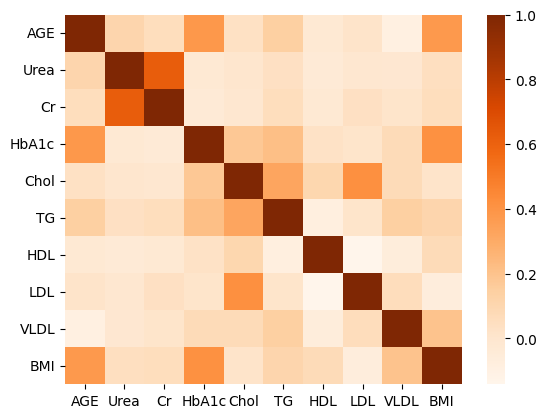

In [12]:
#la correlación solamente se puede hacer en variables numericas
df_numeric = df.select_dtypes(include = ['float64','int64'])
corr_matrix = df_numeric.corr()
print(corr_matrix)
sns.heatmap(corr_matrix, cmap='Oranges')

In [13]:
corr_matrix.gt(0.5)

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
AGE,True,False,False,False,False,False,False,False,False,False
Urea,False,True,True,False,False,False,False,False,False,False
Cr,False,True,True,False,False,False,False,False,False,False
HbA1c,False,False,False,True,False,False,False,False,False,False
Chol,False,False,False,False,True,False,False,False,False,False
TG,False,False,False,False,False,True,False,False,False,False
HDL,False,False,False,False,False,False,True,False,False,False
LDL,False,False,False,False,False,False,False,True,False,False
VLDL,False,False,False,False,False,False,False,False,True,False
BMI,False,False,False,False,False,False,False,False,False,True


Solamente hay una correlación moderada entre Urea y Cr

In [14]:
#tras saber que Gender y Class son categoricos, debo quitar las redundancias
#primero hay un conteo de los valores que tienen.
print("Generos: ", df.Gender.unique())
print("Clases: ",df.CLASS.unique())
print(df.Gender.value_counts())
print(df.CLASS.value_counts())

Generos:  ['F' 'M' 'f']
Clases:  ['N' 'N ' 'P' 'Y' 'Y ']
Gender
M    570
F    437
f      2
Name: count, dtype: int64
CLASS
Y     840
N     102
P      53
Y      13
N       1
Name: count, dtype: int64


In [15]:
#suplantamos los valores redundantes
#localiza por label o boolean array loc[fila,columna] = valor que quiero colocar
df.loc[df.Gender=='f','Gender'] = 'F'
"""
una manera mas rupestre

for i in range(len(data.Gender)):
  if data.Gender.iloc[i] == 'f':
    data.Gender.iloc[i] = 'F'
"""

# Se realiza lo mismo con CLASS $Y es Y y P es Y
df.loc[df.CLASS=='Y ','CLASS'] = 'Y'
df.loc[df.CLASS=='N ','CLASS'] = 'N'
df.loc[df.CLASS=='P','CLASS'] = 'Y'

In [16]:
#imprimimos de nuevo los valores arreglados
print("Generos: ", df.Gender.unique())
print("Clases: ",df.CLASS.unique())
print(df.Gender.value_counts())
print(df.CLASS.value_counts())

Generos:  ['F' 'M']
Clases:  ['N' 'Y']
Gender
M    570
F    439
Name: count, dtype: int64
CLASS
Y    906
N    103
Name: count, dtype: int64


<BarContainer object of 2 artists>

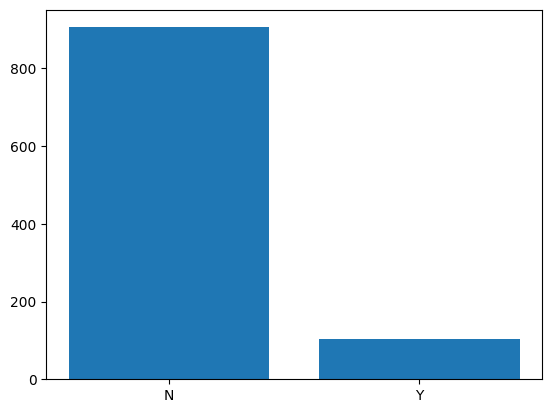

In [17]:
#evaluar cuantas etiquetas hay de cada genero
classes = df.CLASS.unique()
class_counts = df.CLASS.value_counts()
plt.bar(classes,class_counts)

In [18]:
#se verifica que las clases están desbalanceada por lo que habrá que balancear en el entrenamiento
#veamos la correlacion entre genero y clase. como ambas son binarias en ambos usamos la correlacion de pearson
#https://en-m-wikipedia-org.translate.goog/wiki/Phi_coefficient?_x_tr_sl=en&_x_tr_tl=es&_x_tr_hl=es&_x_tr_pto=tc

#La convertimos en dummies
# pasaremos al genero y a las clases a variables categoricas.

df_dummies = pd.get_dummies(df,columns=['Gender','CLASS'], dtype=int)
df_dummies = df_dummies.drop(['Gender_F','CLASS_N'], axis=1)
df_dummies[['Gender_M','CLASS_Y']]

,Gender_M,CLASS_Y
0,0,0
1,1,0
2,0,0
3,0,0
4,1,0
...,...,...
1004,1,1
1005,1,1
1006,1,1
1007,0,1


In [19]:
crosstab = pd.crosstab(df_dummies.Gender_M, df_dummies.CLASS_Y, margins = True, margins_name = 'total')
print(crosstab)

CLASS_Y     0    1  total
Gender_M                 
0          64  375    439
1          39  531    570
total     103  906   1009


In [20]:
#contamos la cantidad de 0 y 1 en cada clase
n00 = crosstab[0][0]
n01 = crosstab[1][0]
n10 = crosstab[0][1]
n11 = crosstab[1][1]
nf0 = crosstab.total[0]
nf1 = crosstab.total[1]
nc0 = crosstab.iloc[2][0]
nc1 = crosstab.iloc[2][1]

rho = (n00*n11-n10*n01)/np.sqrt(nf0*nf1*nc0*nc1)
print(rho)

0.12668655330404135


In [21]:
#se verifica que al ser rho cercano a 0 no hay correlación significativa entre ambas cantidades.

#veamos la distribución de cada atributo
feat = df.drop(['CLASS','Gender'], axis=1)
print(feat.skew(axis=0))

AGE     -0.787
Urea     4.285
Cr       8.495
HbA1c    0.228
Chol     0.617
TG       2.305
HDL      6.303
LDL      1.130
VLDL     5.374
BMI      0.120
dtype: float64


#Se puede ver que existe asimetría en muchas de los atributos
#Para realizar la prueba ANOVA la data debe estar en forma de distribución normal o estar balanceada
# Las etiquetas no están balanceadas por lo tanto hay que transformar.

In [22]:
#función para visualizar la densidad de probabilidad de cada atributo y los cuantiles
from scipy import stats
import pylab
def normality(input, caracteristica):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(input[caracteristica])
    plt.subplot(1,2,2)
    stats.probplot(input[caracteristica],plot=pylab)
   # plt.savefig()
    plt.show()

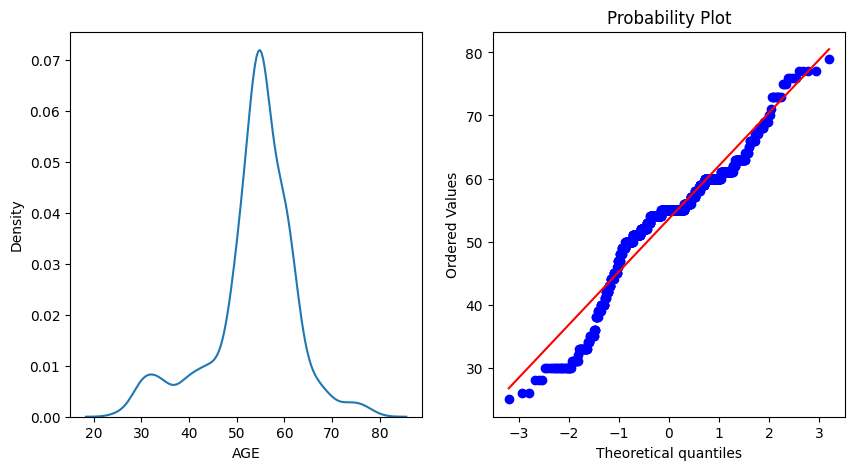

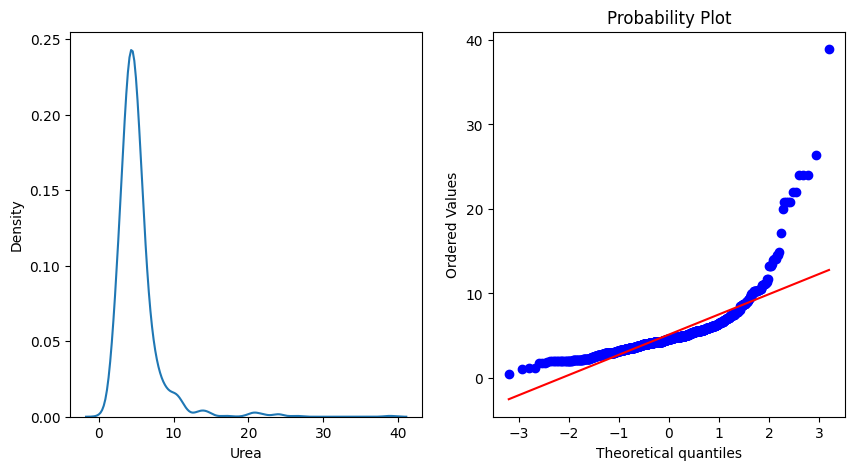

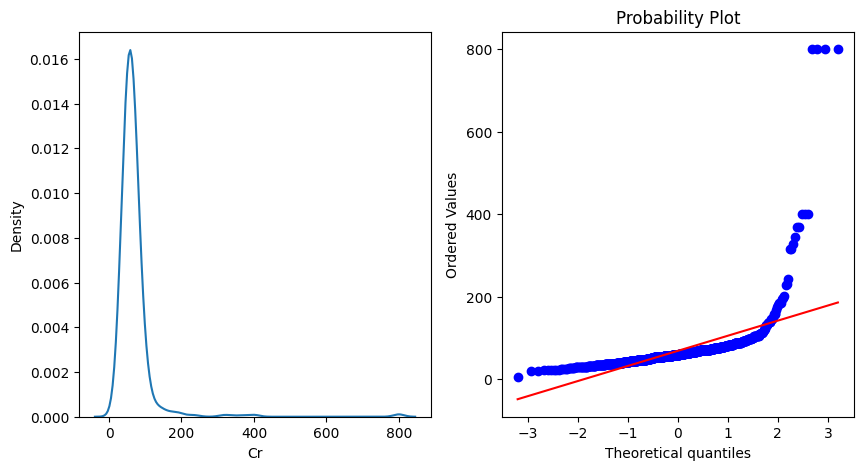

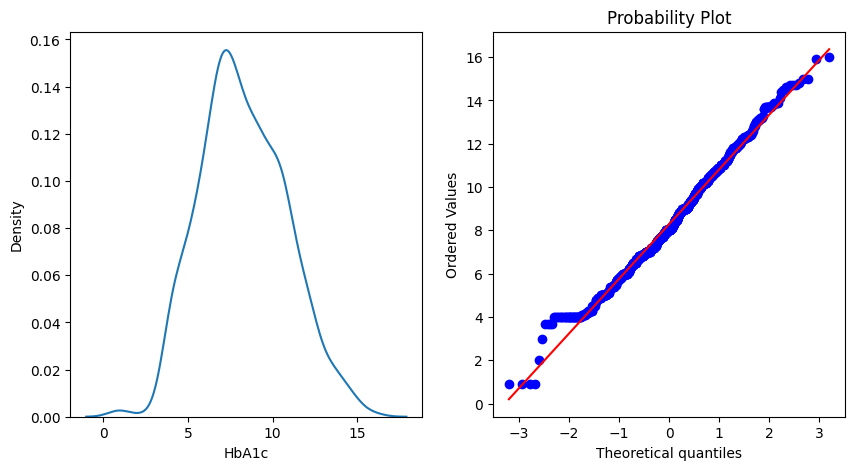

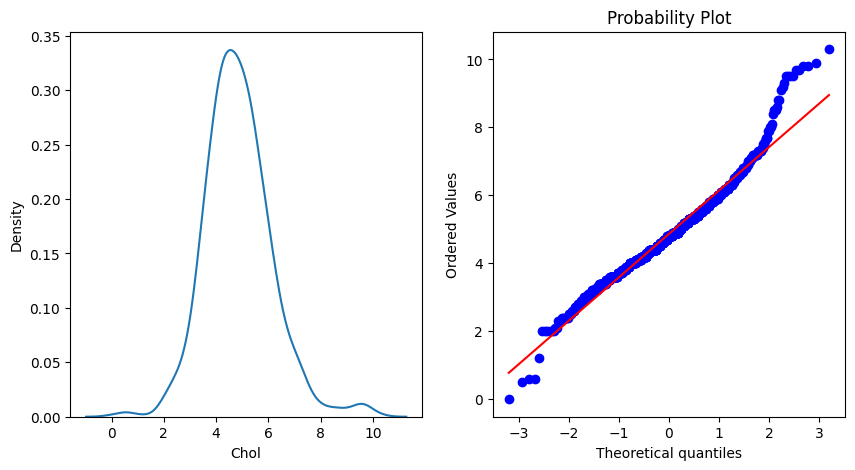

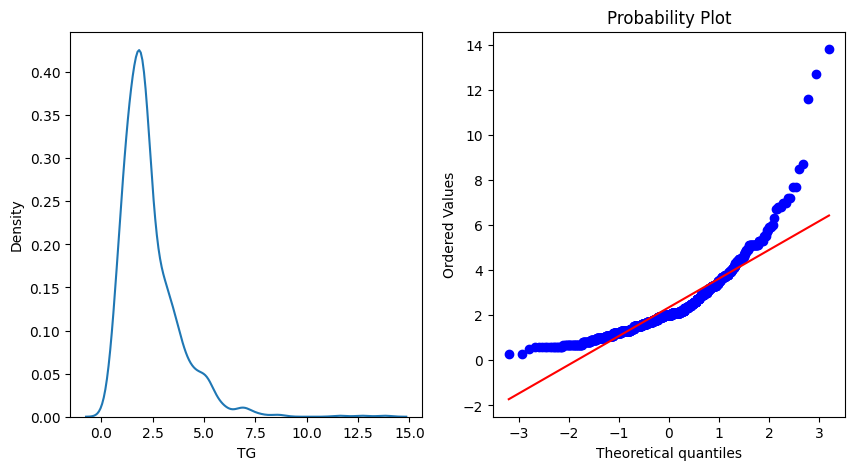

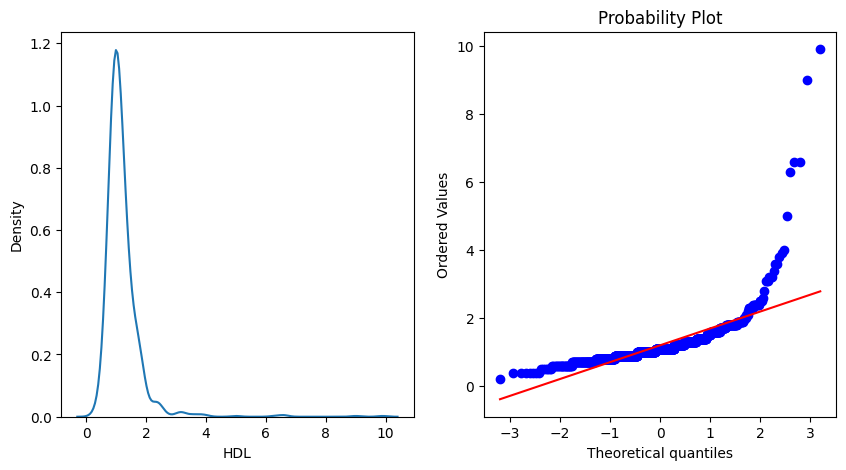

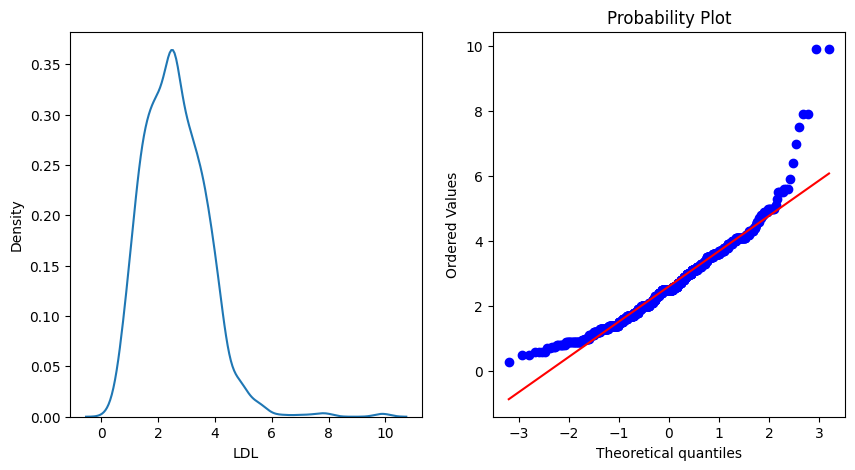

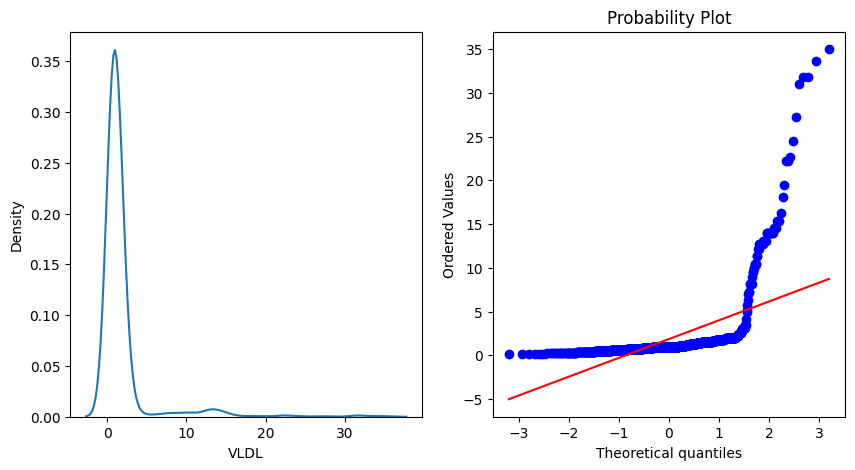

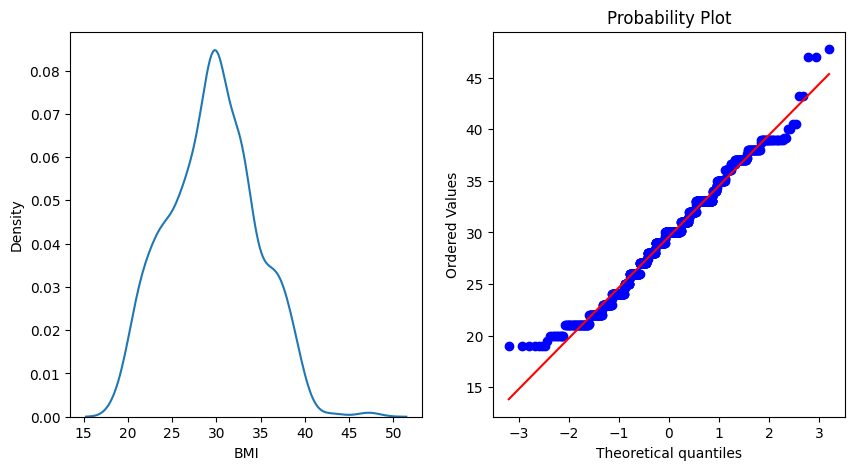

In [23]:
for atributo in feat.columns:
  normality(feat,atributo)

In [24]:
#se realiza la transformación de los valores no normales
for i in range(feat.skew(axis=0).size):
  if -0.5<feat.skew(axis=0)[i] < 0.5:
    print(feat.columns[i],feat.skew(axis=0)[i])


HbA1c 0.22769823795084868
BMI 0.12041229135520413


<ipython-input-24-3d3f58a8a585>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if -0.5<feat.skew(axis=0)[i] < 0.5:
<ipython-input-24-3d3f58a8a585>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(feat.columns[i],feat.skew(axis=0)[i])


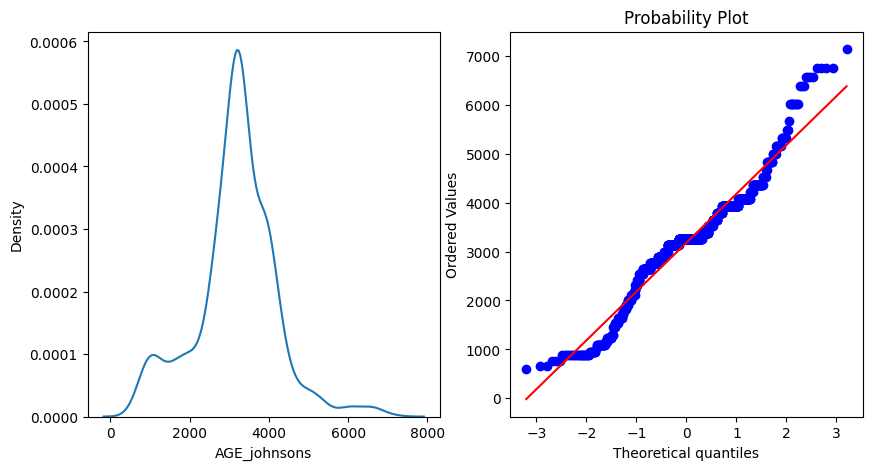

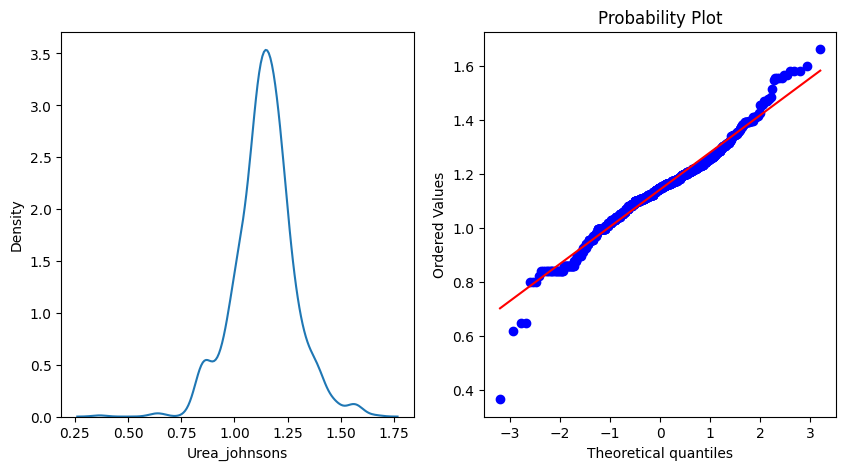

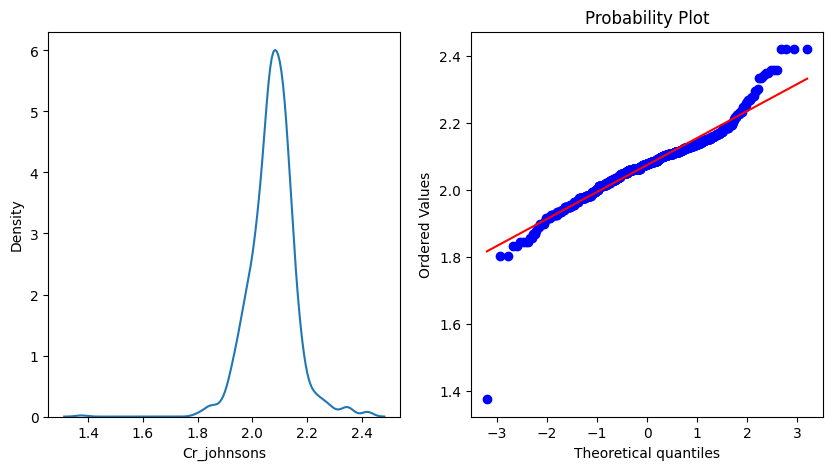

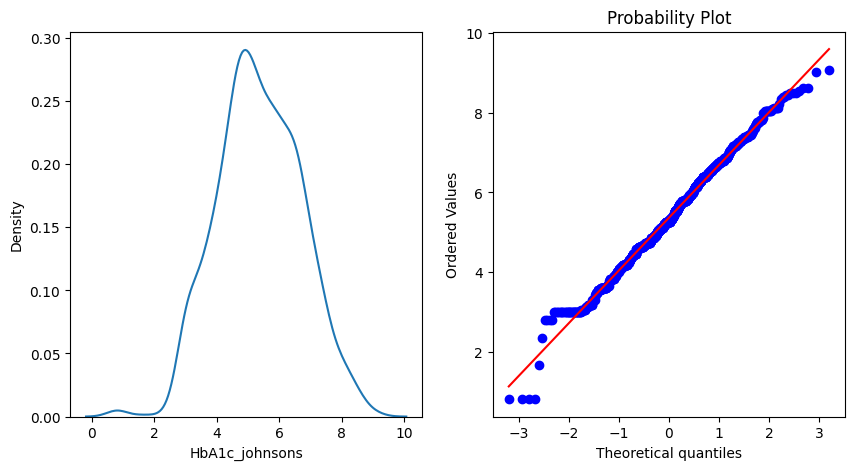

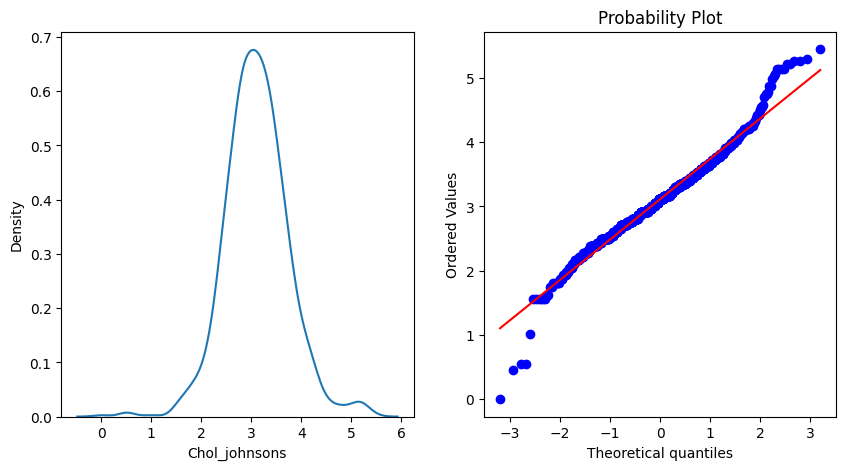

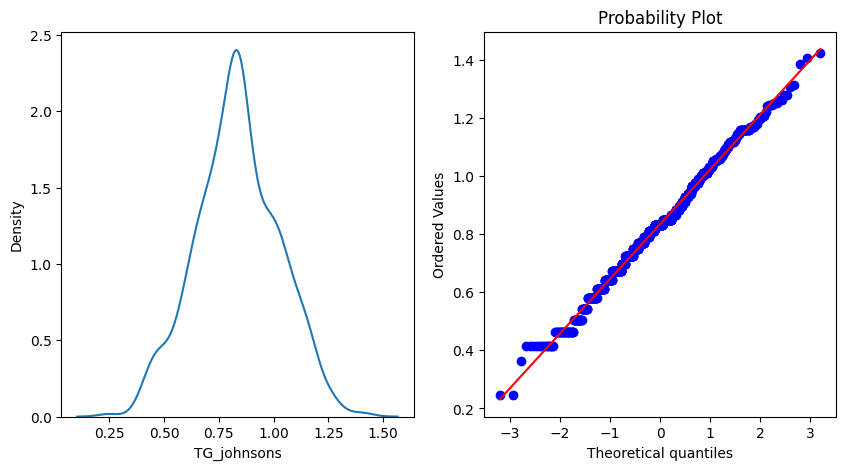

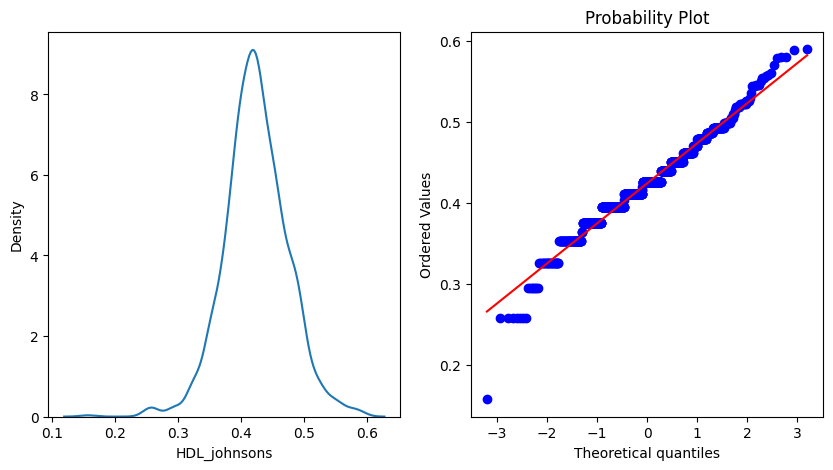

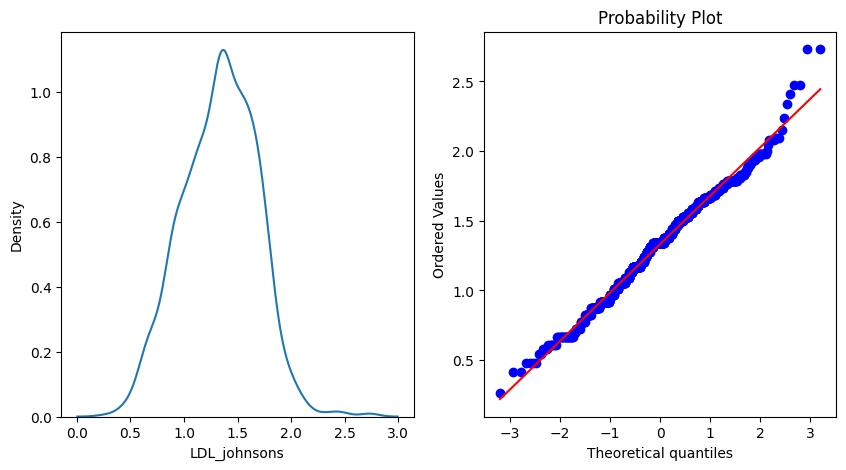

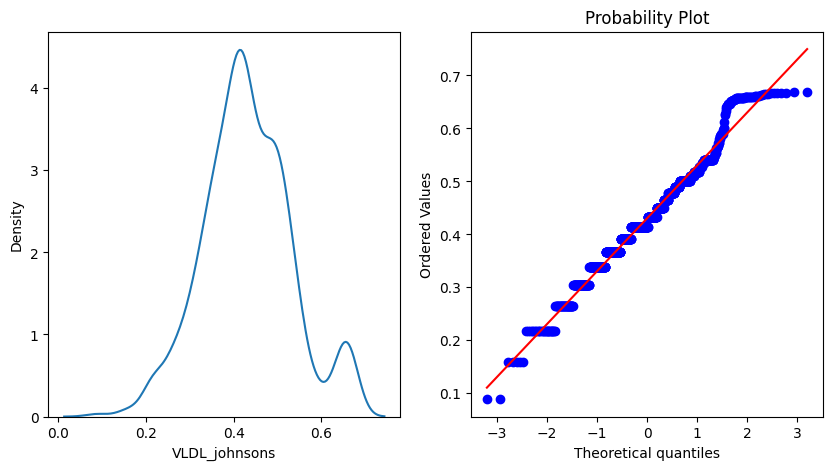

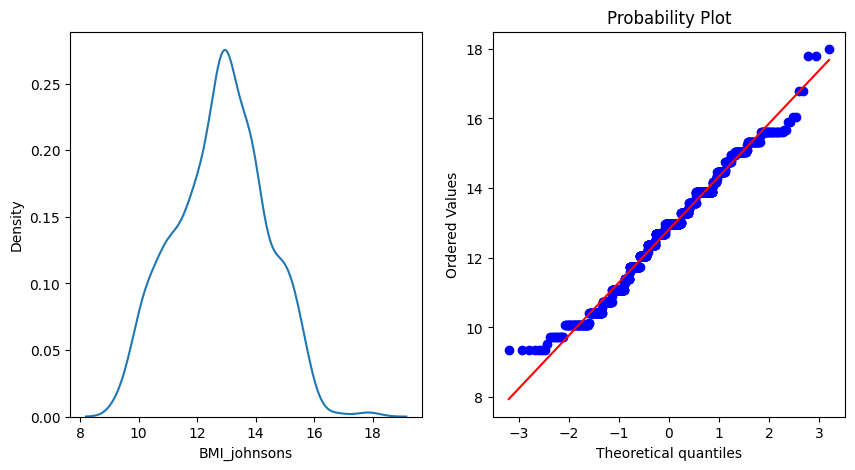

In [25]:
#salvo HbA1c y BMI, las características poseen una asimetría moderada o alta asimetría
#usaremos una transformacion box-cox ya que ln y sqrt no aceptan valores negativos

for atributo in feat.columns:
  feat[atributo+'_johnsons'],param=stats.yeojohnson(feat[atributo])
  normality(feat,atributo+'_johnsons')

In [29]:
feat_transformed = feat.drop(['AGE','Urea','Cr','HbA1c','Chol','TG','HDL','LDL','VLDL','BMI',], axis=1)
#debo normalizarlo ya que las métricas difieren en gran escala
feat_normal = feat_transformed[feat_transformed.columns]/feat_transformed[feat_transformed.columns].max()
print(feat_normal.skew(axis=0))

AGE_johnsons      0.093
Urea_johnsons    -0.099
Cr_johnsons      -0.274
HbA1c_johnsons   -0.002
Chol_johnsons     0.102
TG_johnsons       0.009
HDL_johnsons     -0.115
LDL_johnsons      0.001
VLDL_johnsons     0.131
BMI_johnsons     -0.016
dtype: float64


Para seleccionar el metodo de visualización de variables correctos hay que conocer el tipo de variable que se tiene

In [31]:
#ya visto que no hay correlacion (se hace entre variables continuas)
#hagamos la prueba ANOVA para significancia estadística entre cada variable y el target.
#Como la variable target es categórica, se debe dividir los datos en grupos basados en target.
#Luego, puedes aplicar stats.f_oneway() a los valores de edad que corresponden a cada categoría de target.
df_normal = pd.concat([feat_normal, df_dummies[['Gender_M','CLASS_Y']]], axis=1)
estadisticos = []
for i in feat_normal.columns:
  print(i)
  positivo = df_normal[df_normal['CLASS_Y'] == 1][i]
  negativo = df_normal[df_normal['CLASS_Y'] == 0][i]
  f_stat, p_value = stats.f_oneway(positivo, negativo)
  print(f'Estadístico F: {f_stat}')
  print(f'Valor p: {p_value}')
  if p_value > 0.05:
    print("extraer, no es tiene significancia estadística")
  print('===========================================')

print('Gender_M')
positivo = df_normal[df_normal['CLASS_Y'] == 1]['Gender_M']
negativo = df_normal[df_normal['CLASS_Y'] == 0]['Gender_M']
f_stat, p_value = stats.f_oneway(positivo, negativo)
print(f'Estadístico F: {f_stat}')
print(f'Valor p: {p_value}')
if p_value > 0.05:
  print("extraer, no es tiene significancia estadística")


AGE_johnsons
Estadístico F: 132.40318555744557
Valor p: 7.124354978787683e-29
Urea_johnsons
Estadístico F: 4.99539770737956
Valor p: 0.025633451795336402
Cr_johnsons
Estadístico F: 4.082773258403123
Valor p: 0.04358679569482636
HbA1c_johnsons
Estadístico F: 372.50457170285165
Valor p: 7.214276199909269e-71
Chol_johnsons
Estadístico F: 26.716237953628298
Valor p: 2.8409347746464957e-07
TG_johnsons
Estadístico F: 55.72215078590549
Valor p: 1.803259133900487e-13
HDL_johnsons
Estadístico F: 1.1198660230162518
Valor p: 0.29020108284940455
extraer, no es tiene significancia estadística
LDL_johnsons
Estadístico F: 0.14628771397759305
Valor p: 0.7021892075031624
extraer, no es tiene significancia estadística
VLDL_johnsons
Estadístico F: 42.910789177885164
Valor p: 9.123122395231012e-11
BMI_johnsons
Estadístico F: 344.40269032935777
Valor p: 2.350331935919542e-66
Gender_M
Estadístico F: 16.425449130683123
Valor p: 5.4497898642958024e-05


# De aqui se concluye que del vector inicial se extraeran: HDL LDL


#el vector de atributos será [AGE,Urea, Cr, HbA1, Chol, TG, VLDL, BMI, Gender]

In [35]:
df_normal = df_normal.drop(['HDL_johnsons','LDL_johnsons'], axis=1)
df_normal.to_csv('data_normalizada')

Index(['AGE_johnsons', 'Urea_johnsons', 'Cr_johnsons', 'HbA1c_johnsons',
       'Chol_johnsons', 'TG_johnsons', 'HDL_johnsons', 'LDL_johnsons',
       'VLDL_johnsons', 'BMI_johnsons', 'Gender_M', 'CLASS_Y'],
      dtype='object')